In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [4]:
# get mnist data
data = datasets.fetch_openml(
    'mnist_784',
    version = 1,
    return_X_y = True
)
pixel_values, targets = data
targets = targets.astype(int)

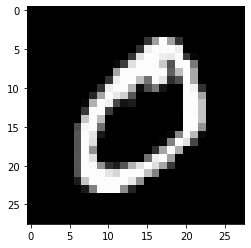

In [5]:
# plot a single row of the data
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap = 'gray')

In [8]:
# transform the data using t-distributed stochastic neighborhood embedding
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [9]:
# convert into a dataframe
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0
...,...,...,...
2995,9.038110,58.850792,7.0
2996,-29.405334,-60.951775,0.0
2997,13.466378,47.369007,9.0
2998,-2.435752,7.983772,1.0


/Users/uraval/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


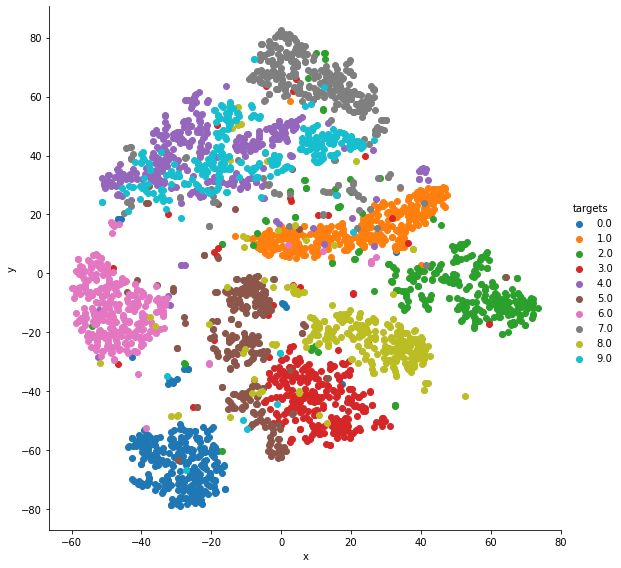

In [10]:
# plot the transformed unsupervised data along with supervised labels
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()